In [15]:
pip install opencv-python


     |████████████████████████████████| 49.5 MB 9.5 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib as mat
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
data = pd.read_csv('/home/arjun/Downloads/datasets_1436_2571_Wine.csv',header=None)
data.columns=['classified','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data


,classified,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Wine Classification Based on Alcohol and Flavanoids 

### FalsePositiveRate and Misqualified rate of wine is mentioned

Size of each wine is {1: 59, 2: 71, 3: 48}
Expected and actual wines are:(Here key is the expected wine and value as frequency of actual wine) 
{'wine1': {'wine2': 3, 'wine3': 0}, 'wine2': {'wine1': 4, 'wine3': 1}, 'wine3': {'wine1': 0, 'wine2': 10}}

Expected wine is wine1 but misqualified as wine2 with value 3
Expected wine is wine2 but misqualified as wine1 with value 4
Expected wine is wine2 but misqualified as wine3 with value 1
Expected wine is wine3 but misqualified as wine2 with value 10

Below are false postive rates of each wine: 
False Positive percentage of wine1 is 5.084745762711864%
False Positive percentage of wine2 is 7.042253521126761%
False Positive percentage of wine3 is 20.833333333333332%

False Positive values of each wine where list represents [wine1,wine2,wine3] 
[3, 5, 10]

Below are Misqualified rates of each wine: 
Misqualified percentage of wine1 is 6.779661016949152%
Misqualified percentage of wine2 is 18.309859154929576%
Misqualified percentage of wine3 is

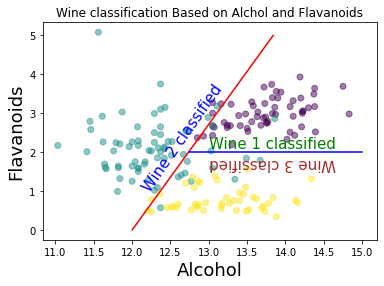

In [9]:
plot= plt.figure()
scatter_plot= plot.add_subplot(1,1,1)
scatter_plot.scatter(x=data['Alcohol'],y=data['Flavanoids'],c=data['classified'],alpha=0.5,label="wine")
plt.xlabel('Alcohol',fontsize=18)
plt.ylabel('Flavanoids',fontsize=18)


wine2_point = [13.84,5]
wine2_other_point =[12,0]
x_values = [wine2_point[0], wine2_other_point[0]]
y_values = [wine2_point[1],wine2_other_point[1]]
plt.plot(x_values,y_values,c='red')
plt.annotate('Wine 2 classified',xy=(12.1,1),rotation=55,color='blue',size=15)


wine1_point = [12.74,2]
wine1_other_point =[15,2]
x_values = [wine1_point[0], wine1_other_point[0]]
y_values = [wine1_point[1],wine1_other_point[1]]
plt.plot(x_values,y_values,c='blue')
plt.title('Wine classification Based on Alchol and Flavanoids')
plt.annotate('Wine 1 classified',xy=(13,2.1),color='green',size=15)
plt.annotate('Wine 3 classified',xy=(13,1.6),rotation=180,color='Brown',size=15)


classfied_data = data[['classified','Alcohol','Flavanoids']]
size_of_each_wine=classfied_data.groupby('classified').size().to_dict()
misqualified_values={'wine1':{'wine2':0,'wine3':0},
                    'wine2':{'wine1':0,'wine3':0},
                    'wine3':{'wine1':0,'wine2':0}}
false_positive_eachwine=[0,0,0]
misqualified_each_wine=[0,0,0]
print("Size of each wine is "+str(size_of_each_wine))
for i,row in classfied_data.iterrows():
    classified_value = row['classified']
    Alchol_value = row['Alcohol']
    Flavanoids_value = row['Flavanoids']
    
    if((wine2_other_point[0] - wine2_point[0])*(Flavanoids_value - wine2_point[1]) - (wine2_other_point[1] - wine2_point[1])*(Alchol_value - wine2_point[0])< 0):
            if(classified_value!=2):
                misqualified_values['wine2']['wine'+str(int(classified_value))]+=1
                false_positive_eachwine[1]+=1
                misqualified_each_wine[int(classified_value-1)]+=1
    
    elif(Flavanoids_value>wine1_point[1]):
        if(classified_value!=1):
            misqualified_values['wine1']['wine'+str(int(classified_value))]+=1
            false_positive_eachwine[0]+=1
            misqualified_each_wine[int(classified_value-1)]+=1
    else:
        if(classified_value!=3):
            misqualified_values['wine3']['wine'+str(int(classified_value))]+=1
            false_positive_eachwine[2]+=1
            misqualified_each_wine[int(classified_value-1)]+=1
        
print("Expected and actual wines are:(Here key is the expected wine and value as frequency of actual wine) \n"+str(misqualified_values)+"\n")


for excpected_wine,value in misqualified_values.items():
    for actual_wine,no in value.items():
        if(no >0):
            print("Expected wine is " + excpected_wine + " but misqualified as " + actual_wine + " with value "+ str(no))
        

print("\nBelow are false postive rates of each wine: ")

for wine,total_value in size_of_each_wine.items():
    false_positive_percentage = (false_positive_eachwine[int(wine)-1]*100)/total_value
    print("False Positive percentage of wine" + str(wine) + " is " + str(false_positive_percentage) +"%")
print("\nFalse Positive values of each wine where list represents [wine1,wine2,wine3] \n"+ str(false_positive_eachwine))

print("\nBelow are Misqualified rates of each wine: ")

for wine,total_value in size_of_each_wine.items():
    misqualified_percentage = (misqualified_each_wine[int(wine)-1]*100)/total_value
    print("Misqualified percentage of wine" + str(wine) + " is " + str(misqualified_percentage) +"%")
    
print("\nMisqualified values of each wine where list represents [wine1,wine2,wine3] \n" + str(misqualified_each_wine))

# Vertical ,Horizontal and Guassian blur of an Image

Below is the original gray scale image 


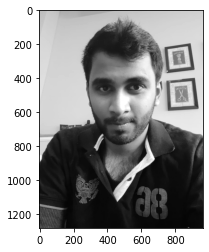

Below Image is vertical edge detected image


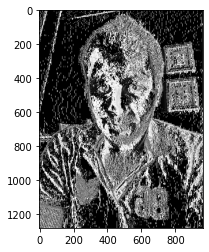

Below Image is Horizontal edge detected image


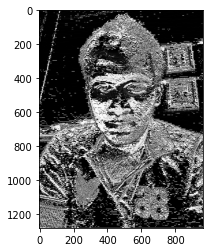

Below image is Guassian blur image


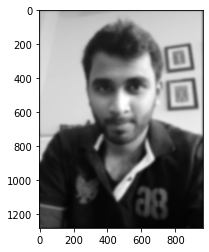

In [16]:
from PIL import Image
import numpy as np
import cv2
im = Image.open('/home/arjun/Downloads/myimage.jpeg').convert('L')
print("Below is the original gray scale image ")
plt.imshow(im,cmap='gray')
plt.show()


sobel_vertical=np.flipud(np.fliplr(np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])))
sobel_horizontal=np.flipud(np.fliplr(np.array([[1,2,1],[0,0,0],[-1,-2,-1]])))

size=43
kernel_size = np.linspace(-(size// 2), size // 2, size)

for i,value in enumerate(kernel_size):
    kernel_size[i] = 1 / (np.sqrt(2 * np.pi) * np.sqrt(size)) * np.exp(-np.power(kernel_size[i] / np.sqrt(size), 2) / 2)
sobel_kernel=np.outer(kernel_size.T,kernel_size.T)
sobel_kernel *=1.0/sobel_kernel.max()

for index,kernel in enumerate([sobel_vertical,sobel_horizontal,sobel_kernel]):
    
    if(index == 2):
        padding = int((size -1)/2)
        result = np.zeros((im.height,im.width))
        addPadd=  np.zeros((im.height + size-1, im.width + size -1))
        addPadd[padding:addPadd.shape[0]-padding, padding:addPadd.shape[1]-padding] = im
    else:
        result=np.zeros_like(im)    
        addPadd= np.zeros((im.height + 2, im.width + 2))
        addPadd[1:-1, 1:-1] = im
    
    for x in range(im.width):    
        for y in range(im.height):
            if(index ==2 ):
                result[y, x]=np.sum(kernel * addPadd[y: y+size, x: x+size])
            else:
                result[y, x]=np.sum(kernel * addPadd[y: y+3, x: x+3])
            
    if(index==0):
        print("Below Image is vertical edge detected image")
    elif(index==1):
        print("Below Image is Horizontal edge detected image")
    else:
        print("Below image is Guassian blur image")

    plt.imshow(result,cmap='gray')
    plt.show()

